In [5]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [6]:
#reading dataset
ds = pd.read_csv('../Dataset/sanFran_clean.csv')
ds.head()

,Unnamed: 0,day,district,result,x,y,location,datetime,year,month,date,time
0,0,Friday,NORTHERN,"ARREST, BOOKED",-122.439758,37.802151,POINT (-122.43975785707501 37.8021507619169),2011-07-01 08:00:00,2011,7,2011-07-01,08:00:00
1,1,Tuesday,TENDERLOIN,"ARREST, BOOKED",-122.414318,37.779944,POINT (-122.414317857881 37.7799444052046),2005-10-18 14:30:00,2005,10,2005-10-18,14:30:00
2,2,Saturday,BAYVIEW,NONE,-122.388799,37.737576,POINT (-122.38879889515101 37.7375755833256),2005-01-29 13:45:00,2005,1,2005-01-29,13:45:00
3,3,Thursday,CENTRAL,PSYCHOPATHIC CASE,-122.414354,37.803109,POINT (-122.41435430115101 37.8031089840376),2011-06-02 02:52:00,2011,6,2011-06-02,02:52:00
4,4,Saturday,BAYVIEW,NONE,-122.401097,37.724556,POINT (-122.401096851568 37.7245556697717),2003-02-01 08:00:00,2003,2,2003-02-01,08:00:00


In [7]:
#creating table for choropleth
dsmap = ds.district.value_counts()
#merge datasets
ds_viz = pd.DataFrame(data=dsmap.values, index=dsmap.index, columns=['Count'])
ds_viz = ds_viz.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
#reset index
ds_viz = ds_viz.reset_index()
ds_viz.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
#show table
ds_viz

,Neighborhood,Count
0,CENTRAL,223962
1,NORTHERN,269229
2,PARK,121070
3,SOUTHERN,394234
4,MISSION,293072
5,TENDERLOIN,189034
6,RICHMOND,114267
7,TARAVAL,158710
8,INGLESIDE,186645
9,BAYVIEW,210729


In [11]:
#Crime rate in each district.

#importing the json file 
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12, tiles='cartodbpositron')

#generating choropleth
sf_map.choropleth(
    geo_data=gjson,
    data=ds_viz,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='RdBu', 
    fill_opacity=0.9, 
    line_opacity=0.5,
    legend_name='Crime Rate in San Francisco'
)

#show map
sf_map
sf_map.save('../Outputs/index.html')

In [5]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [6]:
plt.style.use('seaborn-poster')

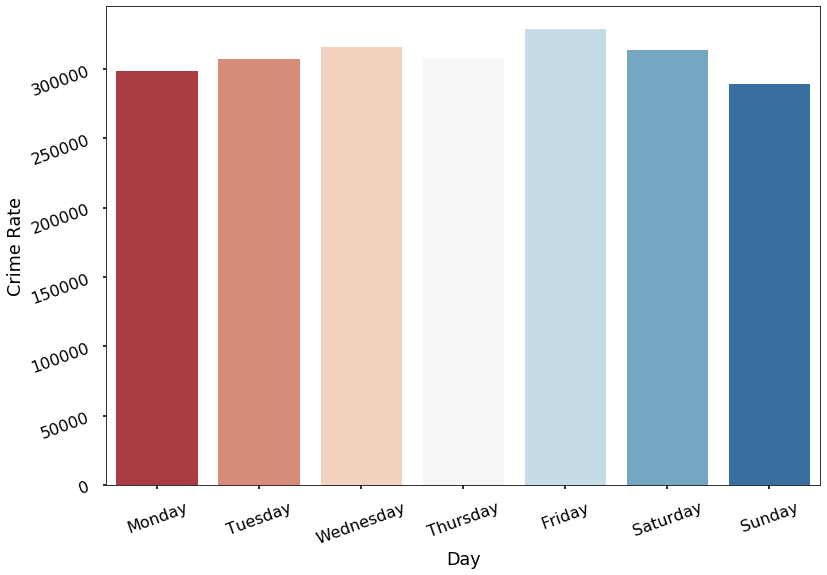

In [7]:
#Which day has the highest crime rate.

sns_plot = sns.countplot(x='day', data=ds, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette = 'RdBu')
plt.tick_params(labelrotation = 20)
plt.ylabel('Crime Rate')
plt.xlabel('Day')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/Fig1.png", dpi = 1000, bbox_inches='tight')

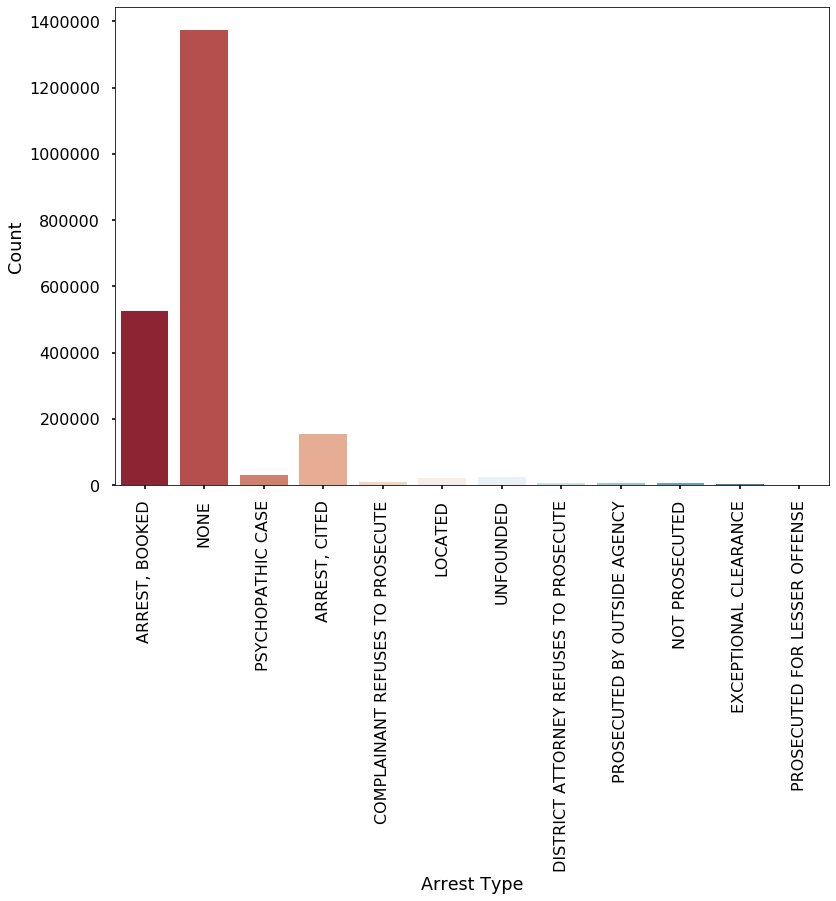

In [8]:
#Types of Arrests

sns_plot = sns.countplot(x='result', data=ds, palette = 'RdBu')
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
plt.ylabel('Count')
plt.xlabel('Arrest Type')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/Fig2.png", dpi = 1000, bbox_inches='tight')

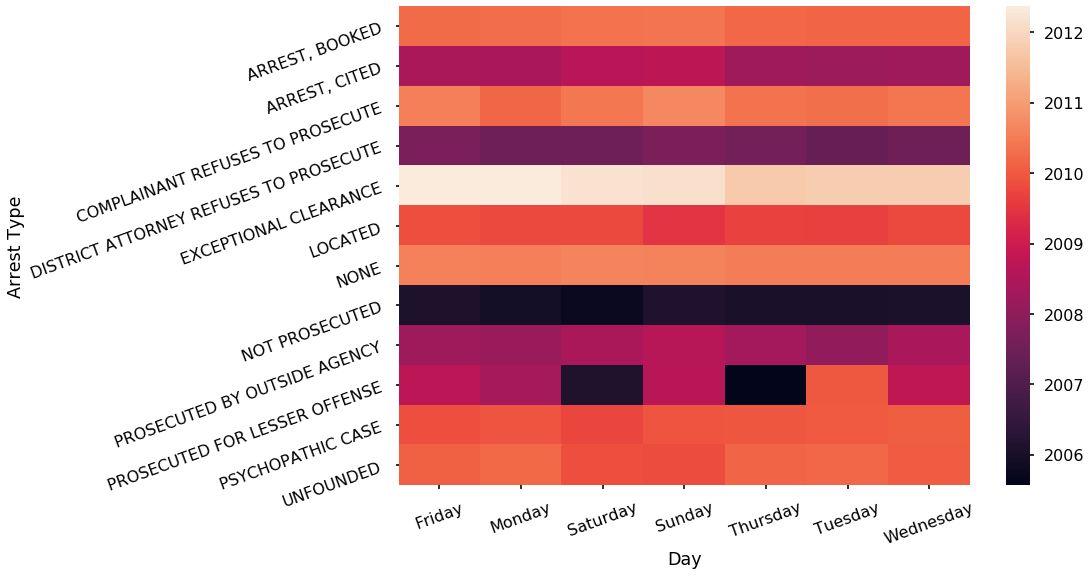

In [9]:
#heatmap
sns_plot = sns.heatmap(pd.crosstab(ds["result"], ds["day"], values=ds["year"], aggfunc='mean'))
plt.ylabel('Arrest Type')
plt.tick_params(labelrotation = 20)
plt.xlabel('Day')
figure = sns_plot.get_figure()
figure.savefig("../Outputs/Heatmap.png", dpi = 1000, bbox_inches='tight')

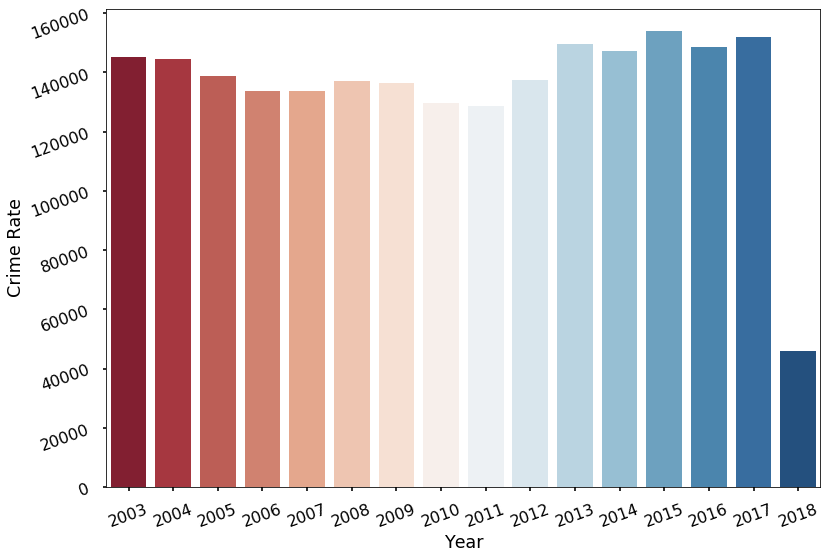

In [10]:
#Which year has the highest crime rate.

sns_plot = sns.countplot(x='year', data=ds, palette = 'RdBu')
plt.tick_params(labelrotation = 20)
plt.ylabel('Crime Rate')
plt.xlabel('Year')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/Fig3.png", dpi = 1000, bbox_inches='tight')

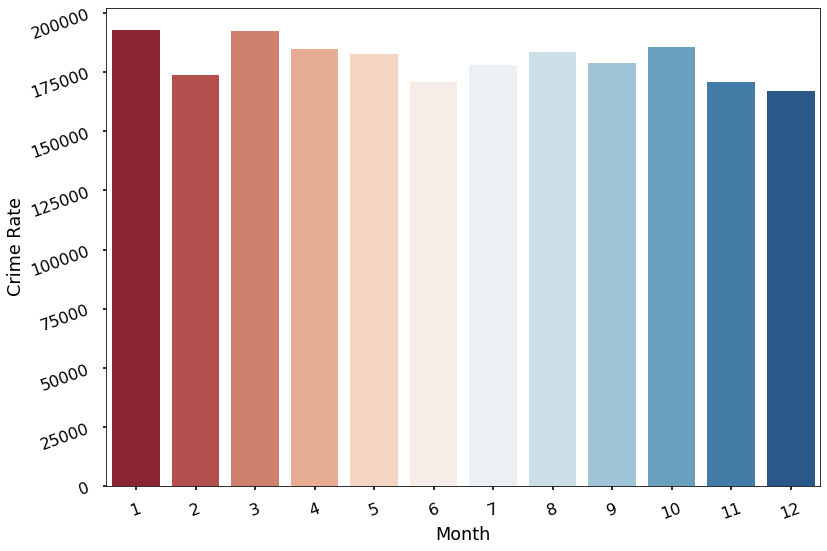

In [11]:
#Which month has the highest crime rate.

sns_plot = sns.countplot(x='month', data=ds, palette = 'RdBu')
plt.tick_params(labelrotation = 20)
plt.ylabel('Crime Rate')
plt.xlabel('Month')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/Fig4.png", dpi = 1000, bbox_inches='tight')

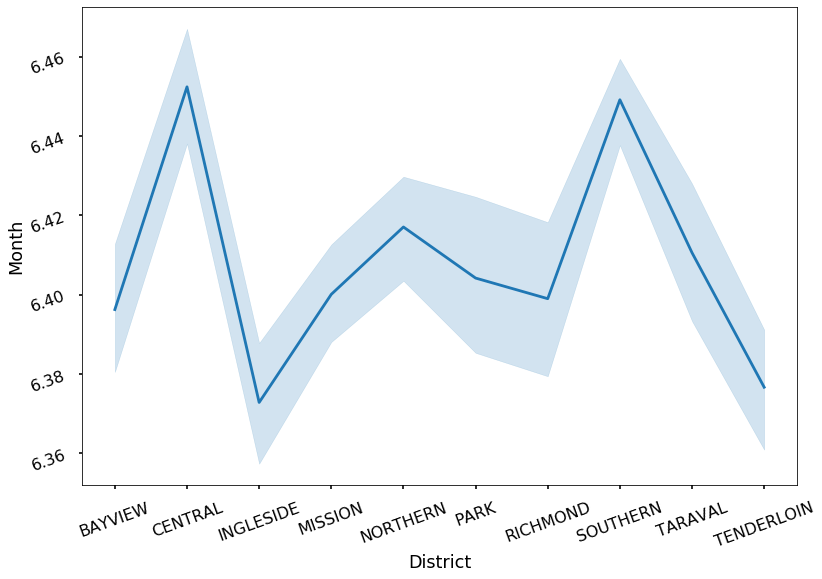

In [13]:
#crime rate in each district in each month
sns_plot = sns.lineplot(x = 'district', y = 'month', data=ds)
plt.tick_params(labelrotation = 20)
plt.ylabel('Month')
plt.xlabel('District')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/Fig5.png", dpi = 1000, bbox_inches='tight')